# Importing some of our libraries

In [2]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import nltk
import string
import gensim

# Building a simple web scraper with snscrape

In [2]:
#lets make our scraper scrape a tweet with the hashtag 'vaccine'.

scraper = sntwitter.TwitterSearchScraper('#vaccine')

In [4]:
# We need to specify what information we would like to pull from the tweets. This will be the date,
# id, content, hashtags and the amount of likes.
# we will also create an empty list to store our tweet data in, and iterate over this to pull
# out the data we want. We can then append this data to our empty list. We will also 
# enumerate over the scraper so that it gives us an index which we can count from. 

from tqdm import tqdm

#Empty list to store tweets
tweets = []

#Loop to iterate over the tweets we get using the 'get_items()' method. The 'tqdm()' function is just used to 
#display a progress bar for the loop, -since this may take a while tio get all 100k!
for i, tweet in tqdm(enumerate(scraper.get_items())):
    #store our tweets in a list called data. Then break once we have reached over 100k tweets.
    data = [
        tweet.date,
        tweet.id,
        tweet.rawContent,
        tweet.hashtags,
        tweet.likeCount,
    ]
    tweets.append(data)
    if i > 100000:
        break

100001it [1:29:18, 18.66it/s]


In [128]:
#So that took around an hour and a half to scrape the 100 thousand tweets using my M2 Macbook Air.
#Now lets convert this list to a pandas dataframe so it is easier to read and work with
tweet_df = pd.DataFrame(tweets, columns = ['date', 'id', 'content', 'hashtags', 'likecount'])

In [6]:
#Beautiful! We also have to remove duplicates 

tweet_df.drop_duplicates(subset = ['content', 'date'])
tweet_df.head()

,date,id,content,hashtags,likecount
0,2023-03-09 11:06:40+00:00,1633786375395762176,"Get a head of the game, get ready for #vaccine...",[vaccine],0
1,2023-03-09 11:03:07+00:00,1633785479463309312,#pfizerfiles #Pfizer #Pharmaceutical #Covid #v...,"[pfizerfiles, Pfizer, Pharmaceutical, Covid, v...",0
2,2023-03-09 11:02:38+00:00,1633785358025367554,Ummmmm...\n#JoeBiden forced millions of wome...,"[JoeBiden, Vaccine, FDA, vaccineinjuries]",0
3,2023-03-09 11:02:00+00:00,1633785200277610496,Lies were told. Those lies harmed the public. ...,"[America, pandemic, COVID19, US, lies, vaccine...",0
4,2023-03-09 11:00:02+00:00,1633784703957311488,"In CA there have been 80,172,163 doses of #vac...",[vaccine],0


In [9]:
#Saving this data to my working directory as a CSV file

tweet_df.to_csv('python_tweets_100k.csv', index = False)

# Start Here

# 1. Text Preprocessing

In [1]:
#Importing necessary libraries (more will be imported throughout the process) 
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import nltk
import string
import gensim
import seaborn as sns

In [129]:
#Using pandas to read our CSV file containing our tweet data.

df = pd.read_csv('python_tweets_100k.csv')

In [130]:
#Since we only really care about the content of our tweets, lets save this column of our dataframe to a Pandas Series.
#Then we convert this to a string data type

text = df['content'].astype(str)

In [144]:
text.iloc[0]

'Get a head of the game, get ready for #vaccine season \n\n@ECG_training'

# 1.1 Lower Casing

In [4]:
#The core of our assignment is to detect patterns in our corpus of text. For this, case sensitivity is not important.
#Lets convert our text to be all lowercase so that it is easier to work with. We can use '.lower()' for this.

text = text.str.lower()

In [5]:
#Lets see how that looks using '.head()' method

text.head()

0    get a head of the game, get ready for #vaccine...
1    #pfizerfiles #pfizer #pharmaceutical #covid #v...
2    ummmmm...\n#joebiden   forced millions of wome...
3    lies were told. those lies harmed the public. ...
4    in ca there have been 80,172,163 doses of #vac...
Name: content, dtype: object

# 1.2 Removal of Punctuation

In [6]:
#Now, lets remove all the punctuation marks from our text. We can do this by making a function. 
#The easiest way to do this is to use 'string.punctuation' method from the 'string' module. This includes all the 
#common punctuation characters found in text.
#The 'remove.punctuation' function will take our text and use the 'translate()' method to remove the punctuation marks.
#We use the 'str.maketrans()'' method to create a translation table that puts all punctuation characters 
#to a space character (' '). This will replace all punctuation with a space character. 
#then we can use '.apply' to apply the function!

punctuation = string.punctuation
def remove_punc(text):
    #function to remove punctuation from text
    return text. translate(str.maketrans(' ',  ' ', punctuation))

text_no_punc = text.apply(lambda text: remove_punc(text))


In [7]:
#Looking much better now!

text_no_punc.head()

0    get a head of the game get ready for vaccine s...
1    pfizerfiles pfizer pharmaceutical covid vaccin...
2    ummmmm\njoebiden   forced millions of women to...
3    lies were told those lies harmed the public th...
4    in ca there have been 80172163 doses of vaccin...
Name: content, dtype: object

# 1.3 Removing Stopwords

In [14]:
#Importing and downloading 'stopwords'. These are words which are considered to have
# little value for NLP. These are words like 'the', 'and', 'in' etc. 

import nltk
from nltk.corpus import stopwords

In [10]:
#Lets define a function to remove all these stopwords from our text. We will create a set of all stopwords in the
#module which are english, since our data should be primarily english. 
#The 'remove_stops()' function takes two inputs, one is the processed text without punctuation and the other is 
#all the stopwords we want removed. The function splits the text into individual words using 'split()', removes the 
#stopwords, and then sticks the words back together using '.join()'. It then returns our cleaned data!

stopwords = set(stopwords.words('english'))

def remove_stops(text_no_punc, stopwords):
    
    #split text into individual words
    words = text_no_punc.split()
    
    #remove stopwords from words
    text_no_stops = [word for word in words if word not in stopwords]
    
    #join words back together into a string
    text_no_stops = ' '.join(text_no_stops)
    
    return text_no_stops
    

In [11]:
#Now we can apply this function to our 'text_no_punct' data and create a pandas series called 'text_no_stops'.
#We can apply the function using lambda here.

text_no_stops = text_no_punc.apply(lambda x: remove_stops(x, stopwords))
text_no_stops.head(5)

0    get head game get ready vaccine season ecgtrai...
1    pfizerfiles pfizer pharmaceutical covid vaccin...
2    ummmmm joebiden forced millions women take exp...
3    lies told lies harmed public lies directly con...
4    ca 80172163 doses vaccine administered represe...
Name: content, dtype: object

# 1.4 Stemming

In [12]:
#Lets try stem some of our words using the Porter stemming algorithm, to reduce the words to their base form.
#The 'poterstemmer()' method in NLTK library removes common suffixes such as '-ing'.
#The 'stem_words()' function takes our string of text and splits it, stems it and joins them back together again.
#We then apply the method.

from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_words(text_no_stops):
    return ' '.join([stemmer.stem(word) for word in text_no_stops.split()])

text_stem = text_no_stops.apply(lambda text_no_punc: stem_words(text_no_punc))

In [13]:
#Lets take a look
text_stem.head(10)

0       get head game get readi vaccin season ecgtrain
1    pfizerfil pfizer pharmaceut covid vaccin vacci...
2    ummmmm joebiden forc million women take experi...
3    lie told lie harm public lie directli contrari...
4    ca 80172163 dose vaccin administ repres 290931...
5    brag flip 2 billion 20 billion vaccin game lik...
6    great news us start april 19 adult elig receiv...
7    south sudan 🇸🇸 plan conduct integr measl follo...
8    studi osakaun publish bmccancer describ novel ...
9    💉zhao et al investig role adaptiveimmun respon...
Name: content, dtype: object

In [15]:
#Here we can see that there is a problem. Stemming has removed the 'e' from words such as vaccine. This is not
#what we want. We can use Lemmatization to fix this.

# 1.5 Lemmatization

In [31]:
#Lets download WordNet dataset which contains all English lemmas (these are the base from of words)

from nltk.stem import WordNetLemmatizer

In [16]:
#We need to create a function 'lemmatize_words()' that uses reduces words to their base form.
#This function will take a string of text as input, such as our 'text_no_stops' data. It splits the input text, 
#applies the function and joins them back together again.

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text_no_stops):
    return ' '.join([lemmatizer.lemmatize(word) for word in text_no_stops.split()])

text_lem = text_no_stops.apply(lambda text_no_stops: lemmatize_words(text_no_stops))


In [17]:
#Lets take a look

text_lem.head()

0    get head game get ready vaccine season ecgtrai...
1    pfizerfiles pfizer pharmaceutical covid vaccin...
2    ummmmm joebiden forced million woman take expe...
3    lie told lie harmed public lie directly contra...
4    ca 80172163 dos vaccine administered represent...
Name: content, dtype: object

In [18]:
#Much better!

# 1.6 Removing Emojis

In [19]:
#Now, since we are working with twitter data, it's likely we have a lot of emojis in our text. This preprocessing step
#is definitely a bit more tricky. We will do our best to remove as many emojis as possible, but since there is
#so many differnt emojis, and they are contantly being added, it is likely we will miss some. This is ok though,
#since we have such a large dataset.
#First, we import the 're' library which supports regular expressions.
#We will store all the emoji regular expression Unicode as 'emoj'
#The function takes a string of text as input and uses re.sub() to replace the emojis in the text if they match the
#Unicode.



import re

def remove_emojis(text_lem):
    emoj = re.compile("["
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U00002600-\U000026FF"  # Miscellaneous Symbols
        u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols And Pictographs
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
        u"\U0001F1E0-\U0001F1FF"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text_lem)



In [20]:
#Apply the function and store it as the variable 'text_without_emojis'

text_without_emojis = text_lem.apply(remove_emojis)

In [22]:
#No emoji! Looks good.

text_without_emojis.head()

0    get head game get ready vaccine season ecgtrai...
1    pfizerfiles pfizer pharmaceutical covid vaccin...
2    ummmmm joebiden forced million woman take expe...
3    lie told lie harmed public lie directly contra...
4    ca 80172163 dos vaccine administered represent...
Name: content, dtype: object

# 1.7 Removing URLs

In [23]:
#Once again, since we are working with twitter data, it likely contain some URL's, as people often tweet links to
#different websites. These will have to be removed from our data.
#Our function 'remove_url' takes in text and uses re.sub() method to replace any sequence starting with 'http' and
#end with a whitespace. wW use a regular expression patter to match our sequence with anything in our data.

def remove_url(text_without_emojis):
    """Remove URLs from a text string"""
    return re.sub(r"http\S+", "", text_without_emojis)

In [24]:
#Applying our function

text_no_url = text_without_emojis.apply(remove_url)

In [25]:
#Saving our fully preprocessed data as the variable 'pre_data'.

text_no_url[0]
pre_data = text_no_url

# 2. Word2Vec Preparation

In [26]:
#For this project, we'll be training a Word2Vec model. This is a popular algorithm that generates word embeddings.
#We can use this model to explore the relationships between the words from our tweets.

from gensim.models import Word2Vec

In [207]:
#Lets see our data as a pandas dataframe

pd.DataFrame(pre_data).head()

,content
0,get head game get ready vaccine season ecgtrai...
1,pfizerfiles pfizer pharmaceutical covid vaccin...
2,ummmmm joebiden forced million woman take expe...
3,lie told lie harmed public lie directly contra...
4,ca 80172163 dos vaccine administered represent...


In [208]:
#We still have our over 100k tweets, which is good.

pd.DataFrame(pre_data).count()

content    100002
dtype: int64

In [209]:
#We can now call the '.split' method on our data. Although one would usually call the .word_tokenize method, we can use
#split, since all our stopwords are already removed beforehand.

def split_text(pre_data):
    return pre_data.split()

In [210]:
#Lets take a look. Looks good!

data = pre_data.apply(split_text)
data.iloc[0]

['get', 'head', 'game', 'get', 'ready', 'vaccine', 'season', 'ecgtraining']

# 3. Exploring the Data

In [194]:
#Everything is looking good.

data.head()

0    [get, head, game, get, ready, vaccine, season,...
1    [pfizerfiles, pfizer, pharmaceutical, covid, v...
2    [ummmmm, joebiden, forced, million, woman, tak...
3    [lie, told, lie, harmed, public, lie, directly...
4    [ca, 80172163, dos, vaccine, administered, rep...
Name: content, dtype: object

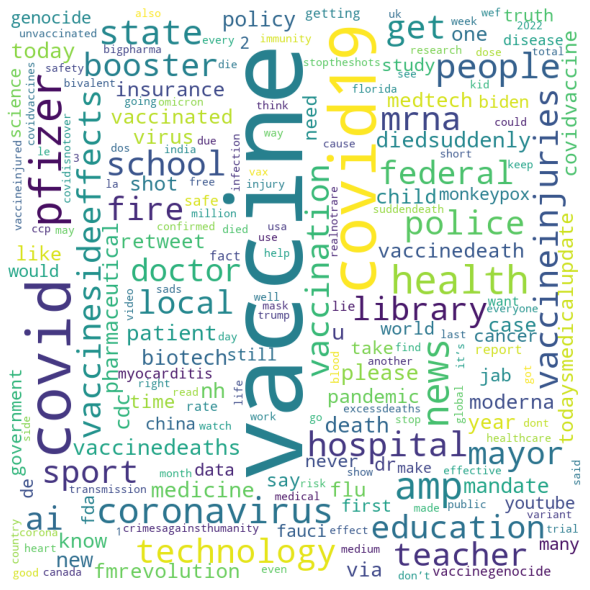

In [195]:
#Importing WordCloud to create some nice visualisations to see the frequencies of the words in the data.

from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 

#Concatenate all the lists of words into a single list
word_list = [word for sublist in data for word in sublist]

#Count the frequency of each word using 'Counter'
word_freq = dict(Counter(word_list))

#Create the word cloud using 'word_freq' and '.generate_from_frequencies'
wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     min_font_size = 10).generate_from_frequencies(word_freq)

#Plotting wordcloud
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [196]:
#As we can see here, the most freqient words are 'vaccine', 'covid19', 'pfizer', etc...

In [197]:
#We can also view this information in a list format, with the count of each word also.
#Lets have a look at the top 15 most frequently occuring words.

#We need to first sort the words in order of word frequencies using 'sorted()'.

sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse = True)

#Slicing the words for the first 15 values.

top_words = sorted_word_freq[:15]

print(top_words)

[('vaccine', 118578), ('covid19', 29229), ('covid', 25143), ('pfizer', 10694), ('health', 8717), ('amp', 8481), ('news', 8187), ('coronavirus', 7568), ('state', 7413), ('people', 7409), ('hospital', 6655), ('get', 6620), ('mrna', 6547), ('school', 6479), ('police', 6312)]


In [198]:
#These words do not tell us much about our data, since we already know our text is about Vaccines.
#Lets remove these top words and have a look for some interesting patterns hidden under these main words.


In [199]:
#In order to find some interesting patterns in the data, lets try removing these top 15 words. 

#Extracting the top words as a list rather than tuple
top_words = [word for word, freq in sorted_word_freq[:15]]

#Storing our new list without these top words as the varibale 'filteres_word_list'
filtered_word_list = [word for word in word_list if word not in top_words]

filtered_word_list[:15]

['head',
 'game',
 'ready',
 'season',
 'ecgtraining',
 'pfizerfiles',
 'pharmaceutical',
 'vaccinesideeffects',
 'vaccineinjuries',
 'pbhushan1',
 'rwac48',
 'bdutt',
 'sardesairajdeep',
 'ummmmm',
 'joebiden']

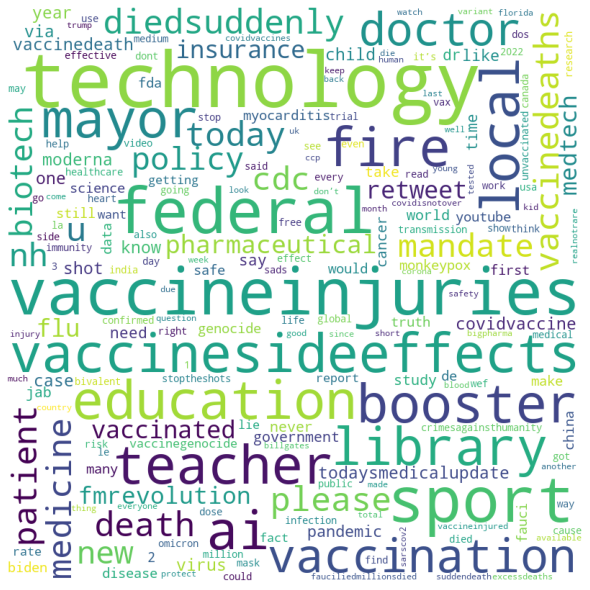

In [200]:
#now lets see what our wordcloud looks like without these words...
#count the frequency of each word
word_freq = dict(Counter(filtered_word_list))

#create the word cloud using word_freq
wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     min_font_size = 10).generate_from_frequencies(word_freq)

#plotting wordcloud
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [201]:
#Here we can see some interesting words occuring such as 'vaccinesideeffects', 'vaccineinjuries', 'diedsuddenly'. 
#These words indicate that there may be some vaccine hesitancy in these tweets. Lets investigate this further...

In [202]:
#Lets look at the top trigrams. Trigrams are a sequence of three words one after the other in a tweet, and they can 
#help us find some more patterns in our data.


#First we set the value of n equal to 3 (indicating that we're making trigrams)
n = 3

#Create an empty list to store all trigrams
trigrams = []

#Iterate through each tweet in the dataset
for tweet in data:
    
    # Extract n-grams from the tweet
    ngrams = nltk.ngrams(tweet, n)
    
    # Add the n-grams to the list of all n-grams
    trigrams.extend(ngrams)
    
#Create a frequency distribution of the n-grams
freq_dist = nltk.FreqDist(trigrams)

#Print the top n n-grams and their frequency count
print('Top 10 n-grams:')
for gram, count in freq_dist.most_common(10):
    print(gram, '-', count, 'occurrences')


Top 10 n-grams:
('education', 'federal', 'state') - 5630 occurrences
('federal', 'state', 'local') - 5628 occurrences
('state', 'local', 'news') - 5628 occurrences
('local', 'news', 'police') - 5628 occurrences
('news', 'police', 'fire') - 5628 occurrences
('police', 'fire', 'school') - 5628 occurrences
('hospital', 'ai', 'mayor') - 5628 occurrences
('ai', 'mayor', 'teacher') - 5628 occurrences
('mayor', 'teacher', 'technology') - 5628 occurrences
('teacher', 'technology', 'vaccine') - 5628 occurrences


In [203]:
#Storing the top 35 trigrams as a variable
top_ngrams = freq_dist.most_common(35)

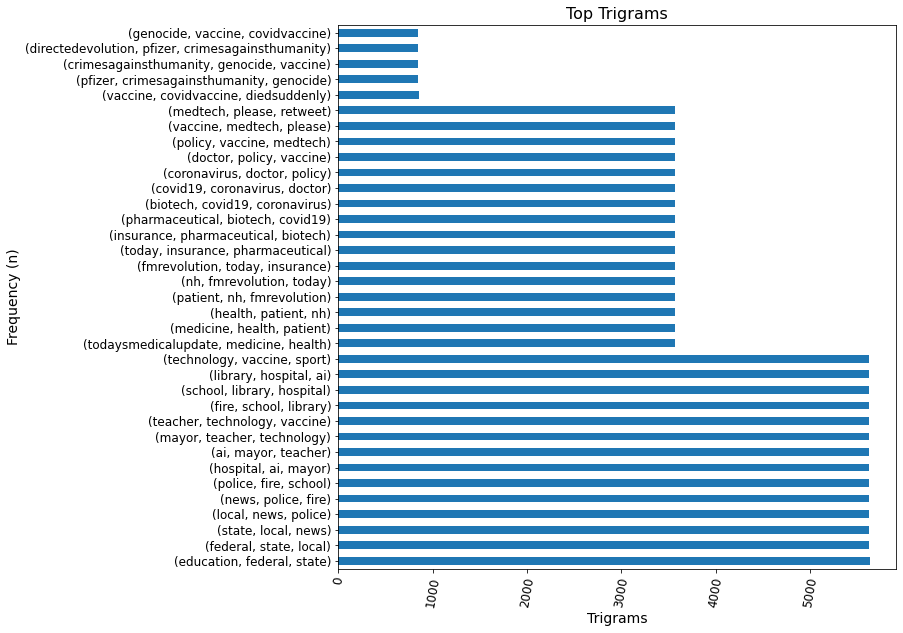

In [215]:
#Making a visualisation to better understand the trigrams in the tweets

#Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))

#converting to a dataframe
df = pd.DataFrame(top_ngrams,columns = ['ngrams', 'frequency'])

#Plot the data
df.plot(x='ngrams', y='frequency', kind='barh', ax=ax, legend=None)

#Set the axis labels and title
ax.set_xlabel('Trigrams', fontsize=14)
ax.set_ylabel('Frequency (n)', fontsize=14)
ax.set_title('Top Trigrams', fontsize=16)

#Rotate the x-axis labels
plt.xticks(rotation=80)

#Set the font size for the tick labels
plt.tick_params(axis='both', which='major', labelsize=12)

#Show the plot
plt.show()


In [73]:
#Strangely, there seems to be three distinct groups trigrams present here. The first, most common group appear to be 
#drawn from tweets about News and Technology. The next, about Health and Medication, and the third about 
#death and vaccine hesitancy.

In [80]:
#Lets remove the expected news and health posting and take a look at the hesistancy tweets.

#Most common trigrams
top_ngrams = freq_dist.most_common(35)

#All the 100 top trigrams 
all_ngrams_ordered = freq_dist.most_common(100)

#Top trigrams from 30-45 
other_ngrams = all_ngrams_ordered[30:45]
other_ngrams


[(('vaccine', 'covidvaccine', 'diedsuddenly'), 852),
 (('pfizer', 'crimesagainsthumanity', 'genocide'), 850),
 (('crimesagainsthumanity', 'genocide', 'vaccine'), 850),
 (('directedevolution', 'pfizer', 'crimesagainsthumanity'), 849),
 (('genocide', 'vaccine', 'covidvaccine'), 849),
 (('covidvaccine', 'diedsuddenly', 'vaccineinjured'), 849),
 (('diedsuddenly', 'vaccineinjured', 'excessdeaths'), 849),
 (('vaccineinjured', 'excessdeaths', 'realnotrare'), 849),
 (('excessdeaths', 'realnotrare', 'tribunal'), 848),
 (('realnotrare', 'tribunal', 'gallows'), 848),
 (('fact', 'factsmatter', 'factcheck'), 694),
 (('covid', 'covid19', 'vaccine'), 612),
 (('projectveritas', 'directedevolution', 'pfizer'), 602),
 (('vaccine', 'vaccinesideeffects', 'vaccineinjuries'), 546),
 (('vaccine', 'never', 'tested'), 543)]

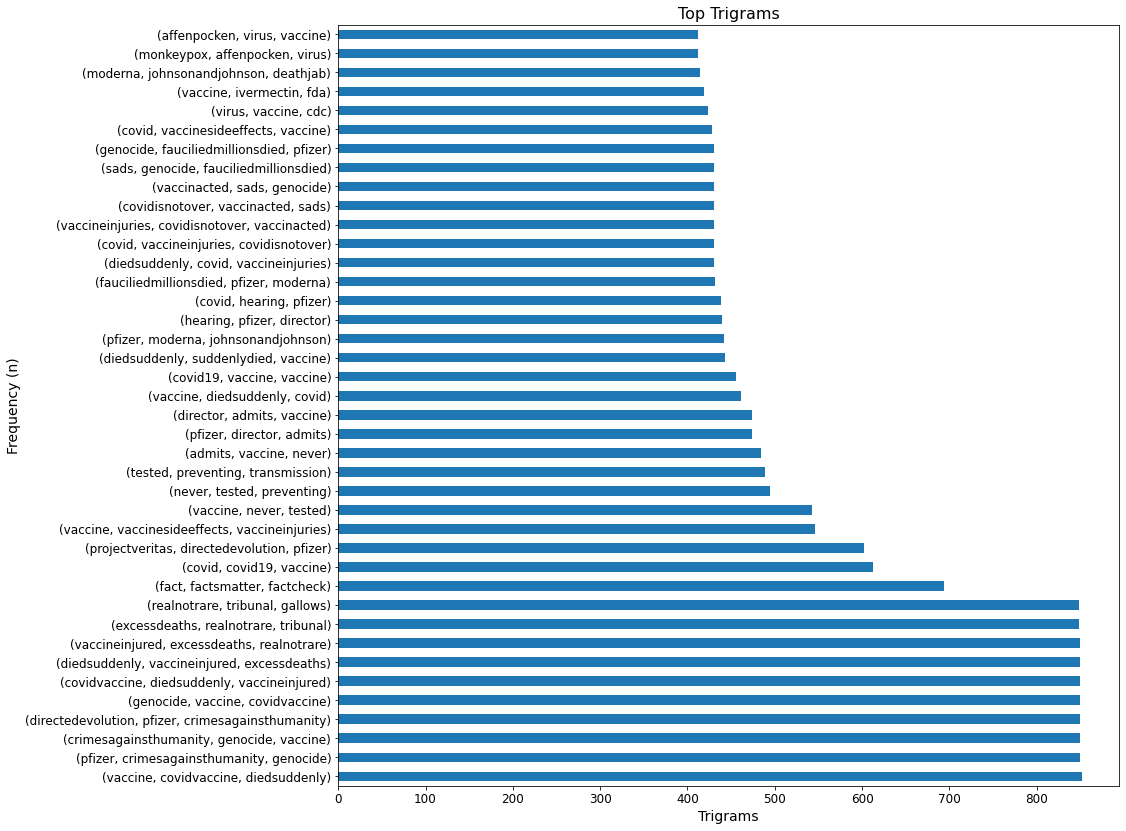

In [82]:
#Now lets dig deeper into these less common trigrams with another visualisation

all_ngrams = freq_dist.most_common()
filtered_ngrams = all_ngrams[30:70]
filtered_ngrams = pd.DataFrame(filtered_ngrams, columns = ['N-Gram', 'Frequency'])

# Set the figure size
fig, ax = plt.subplots(figsize=(14, 14))

# Plot the data
filtered_ngrams.plot(x='N-Gram', y='Frequency', kind='barh', ax=ax, legend=None)

# Set the axis labels and title
ax.set_xlabel('Trigrams', fontsize=14)
ax.set_ylabel('Frequency (n)', fontsize=14)
ax.set_title('Top Trigrams', fontsize=16)


# Set the font size for the tick labels
plt.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.show()

In [ ]:
#Here we can see that underneath the news postings, a huge amount of the tweets are related to vaccine hesitancy.

# 4. Training The Model

In [46]:
#Word2Vec is a machine learning algorithm for generating word embeddings, which are vector representations of words.

#Since this model has already been saved to my laptop locally, I have commented out the line of code, just to avoid
#me from accidently re-training it and saving over it again. 

#No need to run this again, model is saved locally and loaded below
#Here is a breakdown of the parameters used: 'data' is the preprocessed lists of words.
#'Vector_size' is the amount of dimensions that the word vectors will have. In this case, we have used 100 dimensions.
#The 'window' parameter is the context windown size. We have used 5 for this model, meaning that model will learn from
#5 words left and right of the target word when learning its embedding.
#'Min_count' is the minimum amount of times a word must occur in the corpus for it to be included in the model.
#'Workers' are the amount of CPU's used to train the model. The default for this is 4, so lets go with that!

###model = Word2Vec(data, vector_size = 100, window = 5, min_count = 3, workers = 4)###

In [ ]:
#save off the model
###model.save('word2vecVaccineModel')

In [84]:
#load the model
model = Word2Vec.load('word2vecVaccineModel')

In [85]:
#An 'epoch' is the amount of times the model has iterated through the entire corpus to train the model.
#We see here that this is 5 for our model.
model.epochs 

5

In [86]:
#Our corpus count is still over 100k, meaning we have not lost any data throughout our cleaning and training process!
model.corpus_count

100002

# 4.1 Exploring Our Embeddings 

In [87]:
#Lets take a look at one of our embeddings. Here we can see the learned word embedding for the word 'vaccine'.
#As mentioned previously, we chose to create a 100-dimension vector representation for the words. This vector is
#chosen by the model by considering the occurence of the word in relation to the rest of the corpus.

embedding = model.wv['vaccine']
print(embedding)

[ 4.5420167e-01 -3.5633156e-01  1.1804531e+00 -3.7764195e-01
  2.8152955e-01 -1.4138825e+00  1.2253942e+00  7.4490875e-01
  3.2090017e-01  1.2236912e+00  1.8295236e+00 -4.8557866e-01
  2.1049288e-01  3.7506449e-01 -4.8337626e-01 -8.8308722e-01
  7.6732284e-01  4.6777001e-01 -6.1020648e-01 -1.0051535e+00
  3.6254042e-01  1.4232168e-01 -7.7849644e-01 -7.5431168e-01
  1.3885411e+00  7.4525541e-01 -8.2120860e-01 -1.0112520e+00
 -1.2509997e+00  8.9206737e-01  1.8566066e-01 -4.9233311e-01
  2.3249198e-01 -4.7359493e-01  5.7659674e-01 -1.0290028e+00
  5.2911645e-01 -1.7683431e+00 -1.8911663e-02 -1.1831152e+00
  4.2900345e-01 -3.7995770e-04 -2.0119858e+00 -4.3933347e-01
 -1.4988913e-01 -7.9193336e-01 -1.2055686e+00  1.6249136e+00
 -2.3735321e-01  2.6727325e-01 -1.5465569e+00 -2.9766145e-01
  3.4977660e-01  3.4106228e-01  4.7031584e-01 -2.6551136e-01
  1.8946042e+00  6.9368964e-01 -9.4451797e-01  1.5451427e+00
  1.0859714e+00 -1.1920867e+00  5.0879383e-01 -8.0902416e-01
  1.8769182e-01  7.73608

In [97]:
#We can use our model to see the most similar words in the trained embedding space. We can see here that the model 
#knows that words like 'vaccine', 'vax' and 'injection' are all similar. Along with the similar words, this method
#can give a score for how similar words are to each other too.

model.wv.most_similar('vaccine', topn =10)

[('vax', 0.5697968006134033),
 ('moderna', 0.5396389961242676),
 ('injection', 0.509876549243927),
 ('jab', 0.5070022940635681),
 ('covidvaccine', 0.5010741353034973),
 ('vaxx', 0.488386332988739),
 ('agedcare', 0.484760582447052),
 ('protocol', 0.467033714056015),
 ('covidvaccines', 0.46493983268737793),
 ('deadly', 0.46187132596969604)]

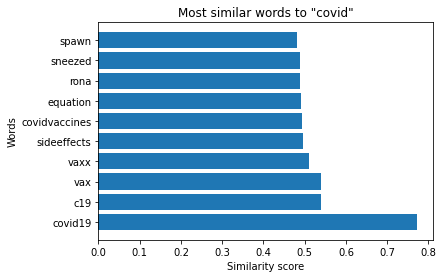

In [114]:
#Lets take a look at the 10 most similar words to 'covid'. This is a great example, as it clearly shows that the model
#understands the meaning of the words. It sees that there are many different names for covid, such as 'covid19', 
#'c19', 'rona', etc...

similarities = model.wv.most_similar('covid', topn=10)

#Extracting the words and similarities scores
words = [word for word, similarity in similarities]
scores = [similarity for word, similarity in similarities]

#Visualising the information with a bar chart
plt.barh(words, scores)
plt.xlabel('Similarity score')
plt.ylabel('Words')
plt.title('Most similar words to "covid"')
plt.show()

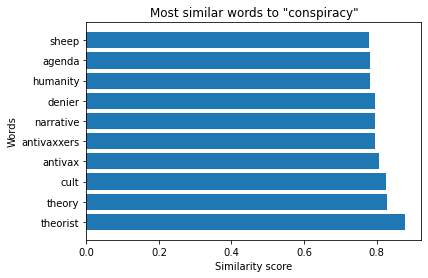

In [54]:
#Here we can see some interesting patterns about vaccine conspiracy theories. The model sees that 'conspiracy' is 
#related to 'cult', 'agenda' and 'sheep'.

similarities = model.wv.most_similar('conspiracy', topn=10)

words = [word for word, similarity in similarities]
scores = [similarity for word, similarity in similarities]

plt.barh(words, scores)
plt.xlabel('Similarity score')
plt.ylabel('Words')
plt.title('Most similar words to "conspiracy"')
plt.show()

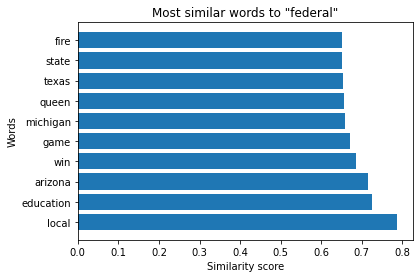

In [216]:
#Here we can see some interesting patterns about vaccine conspiracy theories. The model sees that 'conspiracy' is 
#related to 'cult', 'agenda' and 'sheep'.

similarities = model.wv.most_similar('federal', topn=10)

words = [word for word, similarity in similarities]
scores = [similarity for word, similarity in similarities]

plt.barh(words, scores)
plt.xlabel('Similarity score')
plt.ylabel('Words')
plt.title('Most similar words to "federal"')
plt.show()

In [151]:
#Another great example is how the model knows that the word most related to pfizer, is another pharmaceutical company 
#in astrazeneca. 
print (model.wv.most_similar(positive=['pfizer'], topn=1))

[('astrazeneca', 0.726575493812561)]


In [125]:
#Can our mnodel handle logical anologies?
print(model.wv.most_similar(positive=['vaccine'], negative=['health'], topn=3))

[('learntherisk', 0.37675654888153076), ('pfizerlobby', 0.3701344132423401), ('uscongress', 0.3656872510910034)]


In [127]:
print(model.wv.most_similar(positive=['death'], topn=3))

[('mortality', 0.7971357107162476), ('rollout', 0.6640687584877014), ('noncovid', 0.6623228788375854)]


# 4.2 Network Analysis Visualisation

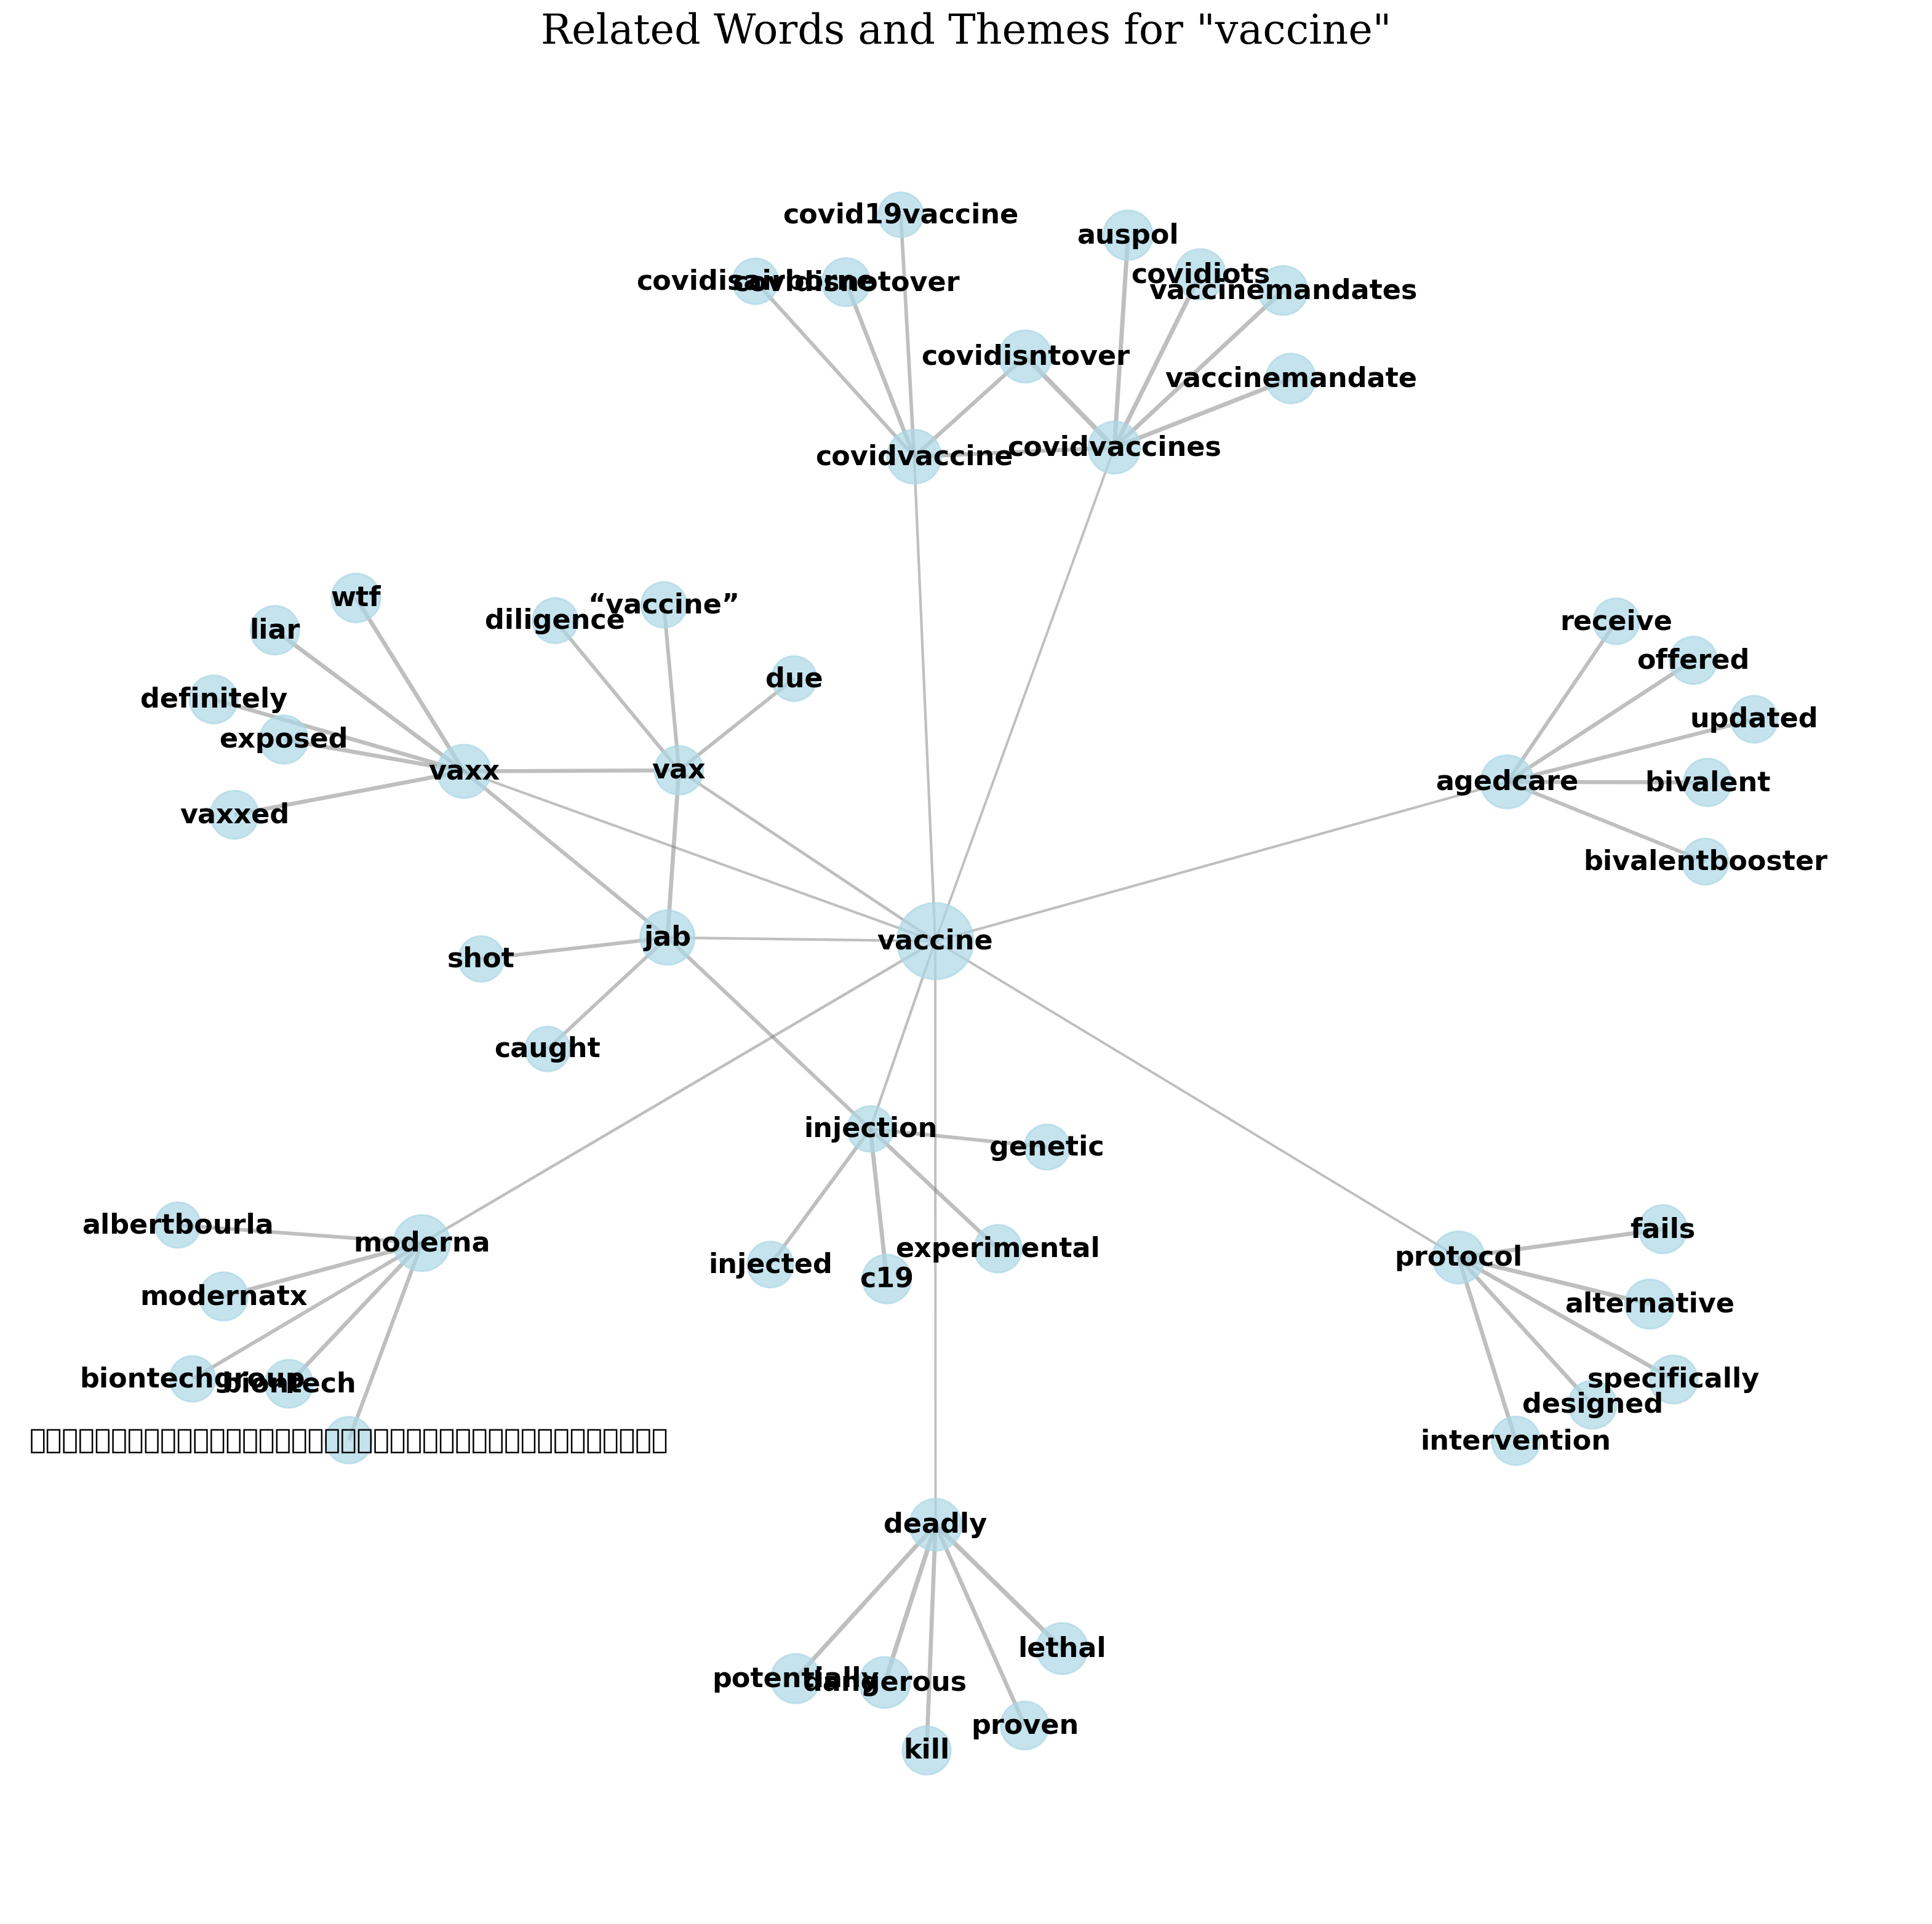

In [175]:
#Import the necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import rcParams

#Settiing the font
plt.rcParams['font.family'] = 'serif'

# Define the word to start with
start_word = 'vaccine'

# Get the most similar words and their cosine similarity scores (this measures distance between embeddings)
similar_words = model.wv.most_similar(start_word, topn=10)

# Create an empty graph
G = nx.Graph()
rcParams['figure.dpi'] = 200


# Add the start word as a node
G.add_node(start_word, size=2000)

# Add the most similar words as nodes, with size proportional to the cosine similarity score
for word, score in similar_words:
    G.add_node(word, size=score*2000)

    # Add edges between the start word and the most similar words
    G.add_edge(start_word, word, weight=score)

    # Get the most similar words to the current word and add edges to them
    sub_similar_words = model.wv.most_similar(word, topn=5)
    for sub_word, sub_score in sub_similar_words:
        G.add_node(sub_word, size=sub_score*1000)
        G.add_edge(word, sub_word, weight=sub_score)

# Set node positions using spring layout
pos = nx.spring_layout(G, seed=42)

# Draw the graph with labels and node sizes based on the 'size' attribute
fig, ax = plt.subplots(figsize=(20, 20))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', alpha=0.7, node_size=[G.nodes[n]['size'] for n in G.nodes()])
nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5, width=[d['weight']*3 for (u, v, d) in G.edges(data=True)])

# Add title and show the plot
plt.title('Related Words and Themes for "{}"'.format(start_word), fontsize=24)
plt.axis('off')
plt.show()


# 4.3 Clustering

In [148]:
#Since we now have our word embeddings, we can cluster the embeddings to help find patterns in the data.
#For this project, we'll be using Kmeans clustering, which will assign each data point to its closest centroid
#Importing kmeans and preparing to conduct clustering 

from sklearn.cluster import KMeans
word_embeddings = model.wv.vectors

In [149]:
#getting vector representation of each word
vectors = []
words = []
for word in model.wv.index_to_key:
    vectors.append(model.wv[word])
    words.append(word)


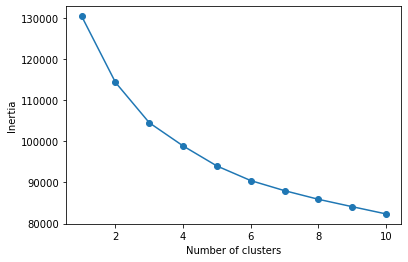

In [150]:
# In order to know the correct number of clusters to use for this example, we can use the 'elbow method'
# In the graph below, we plot the sum of squared distances between each point and its cluster center (inertia)
# We want to find the point where the inertia slows down and forms an 'elbow'.

# Perform k-means clustering for different numbers of clusters
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(word_embeddings)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [176]:
#Above, we can see that around 3 or 4 clusters is the elbow point. Lets go with 3 clusters.

#performing k-means clustering on the vectors
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(word_embeddings)

# group the words based on their cluster assignments
word_clusters = {}
for i, word in enumerate(words):
    label = kmeans.labels_[i]
    if label not in word_clusters:
        word_clusters[label] = []
    word_clusters[label].append(word)

# print the words in each cluster
#for i in range(num_clusters):
#    print(f"Cluster {i+1}: {', '.join(word_clusters[i])}")

In [177]:
#Lets save these clusters as variables

cluster1 = word_clusters[0]
cluster2 = word_clusters[1]
cluster3 = word_clusters[2]


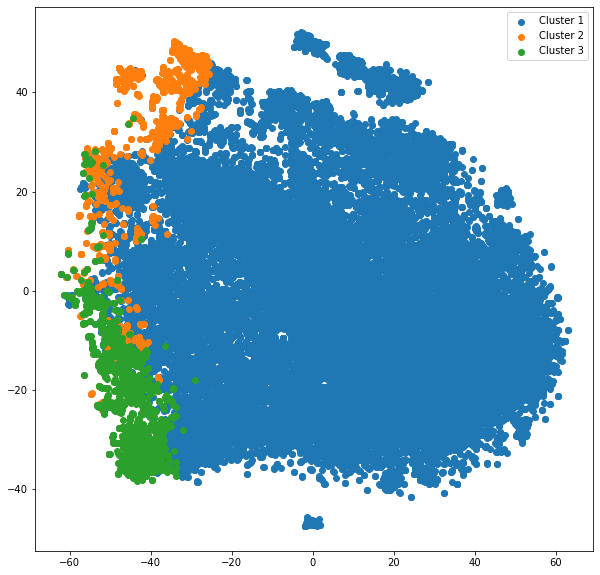

In [89]:
#Now lets visualise these clusters. In order to do this we must reduce the dimensionality 
#of the clusters using t-SNE. This may take 4/5 minutes
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
vectors_2d = tsne.fit_transform(word_embeddings)

# plot the clusters
plt.figure(figsize=(10, 10))
for i in range(num_clusters):
    plt.scatter(vectors_2d[kmeans.labels_==i, 0], vectors_2d[kmeans.labels_==i, 1], label=f"Cluster {i+1}")
plt.legend()
plt.show()

In [96]:
# Ok, so let's explain what each cluster is. To do this, we will use the centroid technique. With each kmeans cluster,
# there is a center point called the centroid which is the average value for all the words in that cluster.
# The centroid is basically a summary of the features in the cluster. We are going to compare the centroids for each 
# cluster with the other clusters, to see how they differ.
# Essentially we are doing this because although we know that all the tweets are similar in that they 
# discuss vaccines, we can gain the most information from knowing how each cluster DIFFERS from eachother.

In [97]:
# extract the centroid for cluster 1
cluster1_indices = [i for i, word in enumerate(words) if word in cluster1]
cluster1_embeddings = word_embeddings[cluster1_indices, :]
cluster1_centroid = cluster1_embeddings.mean(axis=0)

print(f"Cluster 1 centroid: {cluster1_centroid}")

# Extract the centroid for cluster2
cluster2_indices = [i for i, word in enumerate(words) if word in cluster2]
cluster2_embeddings = word_embeddings[cluster2_indices, :]
cluster2_centroid = cluster2_embeddings.mean(axis=0)

print(f"Cluster 2 centroid: {cluster2_centroid}")

# Extract the centroid for cluster3
cluster3_indices = [i for i, word in enumerate(words) if word in cluster3]
cluster3_embeddings = word_embeddings[cluster3_indices, :]
cluster3_centroid = cluster3_embeddings.mean(axis=0)

print(f"Cluster 3 centroid: {cluster3_centroid}")

Cluster 1 centroid: [-0.04760329  0.08354038  0.03705129  0.03831739  0.01275277 -0.11093054
  0.00918667  0.15656474 -0.00481864 -0.07681888 -0.0646931  -0.07746334
 -0.03614104 -0.0016817   0.05733708 -0.07373727 -0.01363483 -0.09591381
  0.01475322 -0.12033648 -0.03842373 -0.02458742  0.04242994  0.04045236
  0.01398108 -0.04445813  0.03210212 -0.00944498 -0.0874152  -0.01928695
  0.04271032 -0.01661025  0.06177006 -0.04527486 -0.00755279  0.07794024
  0.04750283 -0.04169261 -0.04420733 -0.14439909 -0.09656987  0.02142794
  0.02152827 -0.07154556  0.02795229  0.04006843 -0.02197642  0.04136399
  0.00694561  0.04946674 -0.02560184 -0.0255289   0.00584804  0.01215264
  0.00412414  0.0342227   0.05656829 -0.05278023 -0.14906006  0.00833213
  0.00969854  0.05097964 -0.05944055 -0.03608549 -0.0578206   0.07207076
 -0.00600563  0.00880963 -0.05468823  0.08398894  0.02431183  0.07464571
  0.08271012 -0.06958032  0.08655716  0.01659635  0.01807665 -0.00493637
 -0.02674442  0.02587602  0.043

In [98]:
# Compute the absolute difference between the feature values of each pair of clusters
diff12 = abs(cluster1_centroid - cluster2_centroid)
diff13 = abs(cluster1_centroid - cluster3_centroid)
diff23 = abs(cluster2_centroid - cluster3_centroid)

# Identify the features that have the largest differences
num_features = 10

print("Top features distinguishing cluster 1 and cluster 2:")
top_features12 = diff12.argsort()[::-1][:num_features]
for i, feature_index in enumerate(top_features12):
    feature_name = model.wv.index_to_key[feature_index]
    feature_diff = diff12[feature_index]
    print(f"{i+1}. {feature_name}: {feature_diff}")

print("Top features distinguishing cluster 1 and cluster 3:")
top_features13 = diff13.argsort()[::-1][:num_features]
for i, feature_index in enumerate(top_features13):
    feature_name = model.wv.index_to_key[feature_index]
    feature_diff = diff13[feature_index]
    print(f"{i+1}. {feature_name}: {feature_diff}")

print("Top features distinguishing cluster 2 and cluster 3:")
top_features23 = diff23.argsort()[::-1][:num_features]
for i, feature_index in enumerate(top_features23):
    feature_name = model.wv.index_to_key[feature_index]
    feature_diff = diff23[feature_index]
    print(f"{i+1}. {feature_name}: {feature_diff}")

Top features distinguishing cluster 1 and cluster 2:
1. data: 0.7610213756561279
2. fact: 0.7088150978088379
3. coronavirus: 0.6817817687988281
4. one: 0.6777535676956177
5. government: 0.6650943756103516
6. amp: 0.5384894013404846
7. people: 0.5337707996368408
8. mandate: 0.5293245911598206
9. pfizer: 0.5120766758918762
10. policy: 0.4938608705997467
Top features distinguishing cluster 1 and cluster 3:
1. vaccination: 0.8633232116699219
2. study: 0.8371660709381104
3. vaccinesideeffects: 0.8363249897956848
4. monkeypox: 0.7791532874107361
5. retweet: 0.699929416179657
6. policy: 0.699845016002655
7. make: 0.6750432252883911
8. de: 0.6270536184310913
9. government: 0.6106741428375244
10. coronavirus: 0.5822591781616211
Top features distinguishing cluster 2 and cluster 3:
1. government: 1.275768518447876
2. policy: 1.1937059164047241
3. pfizer: 1.0553405284881592
4. data: 1.0333331823349
5. retweet: 0.8896484971046448
6. fact: 0.8455283045768738
7. study: 0.8012866377830505
8. covid: 0.

In [ ]:
# so, as we can see, the distinguishing features (the most different features) between cluster1 and cluster2 are 
#related to politics and government policy, such as 'government', 'policy', 'mandate', etc. 
# this suggests that cluster 1 may contain tweets discussing vaccine policy and government regulations, while cluster2
# may be more related to political opinions. 
#Similarly, the top distinguishing features between cluster1 and cluster3 are related to vaccine safety, research 
# studies, and scientific information, which suggests that cluster1 may contain tweets that discuss vaccine safety,
#research findings, or scientific information related to vaccines, while cluster3 may focus more on government 
#policies or political opinions related to vaccines.


In [99]:
# we can now make some educated guesses about our clusters:
#Cluster 1 appears to be related to political and government-related discussions about vaccines. 
#This makes sense, as it is by far the largest cluster, indicating people tweet most about these topics.
#The top distinguishing features include keywords such as "government", "policy", "mandate", "pfizer", "coronavirus",
#and "data". This suggests that Cluster 1 may contain tweets that discuss government policies related to vaccine
#distribution or mandates, opinions about the safety or efficacy of different vaccines, or political debates 
#surrounding the COVID-19 pandemic.

#Cluster 2 appears to be related to a mix of different topics, including research studies, vaccine safety, and
#scientific information. The top distinguishing features include keywords such as "study", "vaccinesideeffects", 
#"monkeypox", "retweet", and "never". This suggests that Cluster 2 may contain tweets that discuss scientific 
#research on vaccines, opinions about vaccine safety, or retweets of news articles related to vaccines.

#Cluster 3 appears to be related to discussions about vaccination and vaccine safety. The top distinguishing
#features include keywords such as "vaccination", "study", "vaccinesideeffects", "coronavirus", "government", and 
#"policy". This suggests that Cluster 3 may contain tweets that discuss vaccine safety concerns, research studies
#related to vaccines and COVID-19, or opinions about government policies related to vaccines.

# Latent Dirichlet Allocation

In [157]:
#Lets use Latent Dirichlet Allocation (LDA) to further explore the topics in the data. First, import the libraries.
from gensim import corpora, models


In [162]:
#Creating a dictionary from the list of words
dictionary = corpora.Dictionary(data)


In [165]:
#Make a corpus with the vectors previously used
corpus = [dictionary.doc2bow(doc) for doc in data]


In [169]:
#Train the LDA model with 3 topics
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=3)


In [185]:
#Lets have a look at our topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.060*"vaccine" + 0.018*"school" + 0.018*"state" + 0.018*"federal" + 0.018*"teacher" + 0.018*"fire" + 0.018*"hospital" + 0.018*"mayor" + 0.018*"education" + 0.018*"ai"')
(1, '0.052*"vaccine" + 0.052*"sport" + 0.014*"covid19" + 0.012*"covid" + 0.011*"case" + 0.011*"pfizer" + 0.010*"vaccinedeaths" + 0.010*"confirmed" + 0.009*"vaccineinjuries" + 0.009*"vaccinesideeffects"')
(2, '0.054*"vaccine" + 0.024*"covid19" + 0.019*"police" + 0.017*"library" + 0.016*"cervicalcancer" + 0.016*"health" + 0.015*"coronavirus" + 0.013*"today" + 0.013*"patient" + 0.013*"medicine"')


In [171]:
lda_model.show_topics()

[(0,
  '0.060*"vaccine" + 0.018*"school" + 0.018*"state" + 0.018*"federal" + 0.018*"teacher" + 0.018*"fire" + 0.018*"hospital" + 0.018*"mayor" + 0.018*"education" + 0.018*"ai"'),
 (1,
  '0.052*"vaccine" + 0.052*"sport" + 0.014*"covid19" + 0.012*"covid" + 0.011*"case" + 0.011*"pfizer" + 0.010*"vaccinedeaths" + 0.010*"confirmed" + 0.009*"vaccineinjuries" + 0.009*"vaccinesideeffects"'),
 (2,
  '0.054*"vaccine" + 0.024*"covid19" + 0.019*"police" + 0.017*"library" + 0.016*"cervicalcancer" + 0.016*"health" + 0.015*"coronavirus" + 0.013*"today" + 0.013*"patient" + 0.013*"medicine"')]

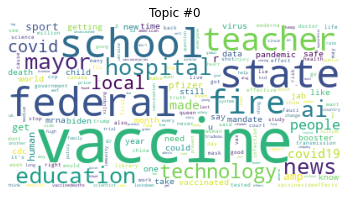

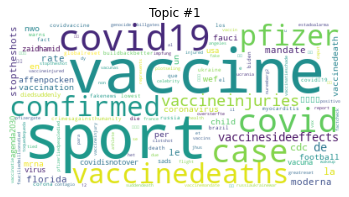

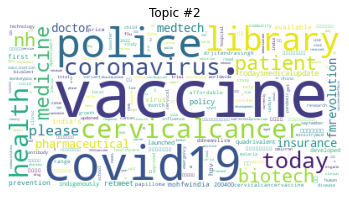

In [172]:
# Create a wordcloud for each topic
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color="white").fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()


In [183]:
#Lets create a cool looking dashboard to see all 3 topics better. We can do this with the pyLDAvis library.
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Convert the gensim corpus and LDA model for use with the dashboard library
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

# Visualize the topic modeling
pyLDAvis.display(lda_display)


/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [ ]:
#Looks cool!
#To use this dashboard, click next and previous topic above. The circles in the bottom left represent the size of the topics. And the 
#Bar chart shows which are the top 30 most occuring terms for each topic. It even gives the percent of tokens for each topic! Pretty cool!
#So as we can see from the above dashboard, Topic 1 is the largest topic (similar to cluster 1) which consists mainly of politics and 
#governbment related discussion. Topic 2 is smaller and cosists of health and vaccine research. Topic 3 is similar to topic 2 in that it 
#relates to health and vaccine safety.